### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_excel(r'C:\Users\Z.A.M\Downloads\EET TEST\Hotels.xlsx')

### some exploration and cleaning

In [3]:
df

,Code,Hotel Name,Roomnights,Sale,Cost,Date,Country
0,CODE|87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,"01, 2019",Saudi Arabia
1,CODE|87816,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,"08, 2019",Germany
2,CODE|87781,Best Western Premier Agung Resort Ubud,1897,37940,34146,"01, 2019",Indonesia
3,CODE|87746,Best Western Posada Freeman,1294,38820,25880,"06, 2019",Mexico
4,CODE|87711,Best Western Pony Soldier Inn & Suites,828,22356,13248,"12, 2019",USA
...,...,...,...,...,...,...,...
2504,CODE|141,Al Hail Waves Hotel,31,682,589,"01, 2019",Oman
2505,CODE|106,Al Eairy Furnished Apartments Tabuk 6,1097,26328,21940,"04, 2019",Saudi Arabia
2506,CODE|71,Al Bandar Rotana,29,638,435,"11, 2019",United Arab Emirates
2507,CODE|36,Aiden by Best Western @ Scottsdale North,495,14850,8910,"09, 2019",USA


In [4]:
df.duplicated().sum()

9

### drop duplicated

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

### null percentage

In [7]:
df.isnull().sum()/len(df)

Code          0.000
Hotel Name    0.000
Roomnights    0.000
Sale          0.000
Cost          0.000
Date          0.000
Country       0.004
dtype: float64

### droping null values

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2490 entries, 0 to 2508
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        2490 non-null   object
 1   Hotel Name  2490 non-null   object
 2   Roomnights  2490 non-null   int64 
 3   Sale        2490 non-null   int64 
 4   Cost        2490 non-null   int64 
 5   Date        2490 non-null   object
 6   Country     2490 non-null   object
dtypes: int64(3), object(4)
memory usage: 155.6+ KB


In [10]:
df.describe()

,Roomnights,Sale,Cost
count,2490.000000,2490.000000,2490.000000
mean,1000.614056,25070.577510,17555.405221
std,576.591141,14915.867269,10313.780088
min,1.000000,28.000000,16.000000
25%,500.500000,12399.750000,8657.000000
50%,1001.000000,24598.500000,17479.000000
75%,1503.750000,37057.500000,26005.750000
max,1999.000000,59130.000000,39720.000000


In [11]:
df['Code'].nunique()

2490

### creating new column (feature engineering)

In [12]:
df['Profit']=df['Sale']-df['Cost']

### Hotels with highest losses

In [13]:
df.groupby('Hotel Name')[['Profit']].agg(np.max).sort_values('Profit')[0:10]

,Profit
Hotel Name,
9Hotel Republique,-1275
Sheraton Moscow Sheremetyevo Airport Hotel,-1122
Aber City Center,-316
#bunk Hotel,-72
Amari Don Muang Airport Bangkok,0
Best Western Andersen's Inn,0
Best Western Hazlet Inn,0
Best Western Adams Inn Quincy - Boston,0
Fairfield by Marriott Curitiba Afonso Pena Airport,0


<AxesSubplot:ylabel='Hotel Name'>

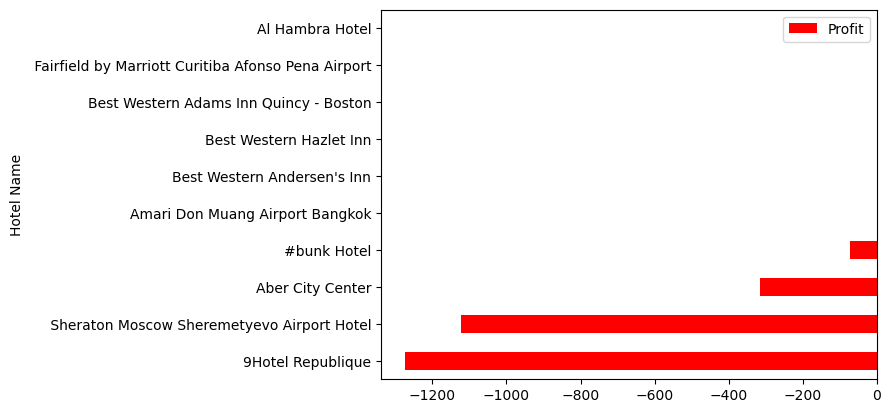

In [14]:
df.groupby('Hotel Name')[['Profit']].agg(np.max).sort_values('Profit')[0:10].plot.barh(color='r')

### Hotels with highest profitability

In [15]:
df.groupby('Hotel Name')[['Profit']].agg(np.max).sort_values('Profit',ascending=False)[0:10]

,Profit
Hotel Name,
acora Hotel und Wohnen,28350
Best Western City Hotel Moran,27706
Aber Khamis Mushait,27495
Arthur Garden Inn Hotel,27286
Bel Azur Hotel,27258
Best Western Abbots Barton Hotel,27076
AC Hotel Raleigh North Hills,26460
Albergo le Due Corti,26348
Amber Hotel,26265


<AxesSubplot:ylabel='Hotel Name'>

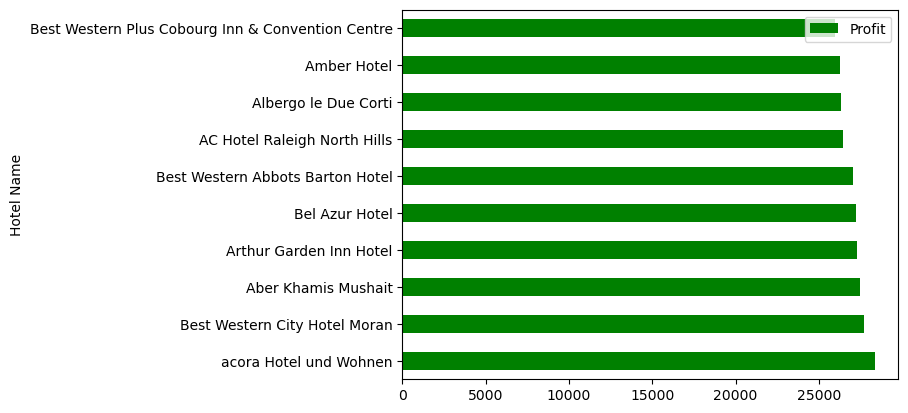

In [16]:
df.groupby('Hotel Name')[['Profit']].agg(np.max).sort_values('Profit',ascending=False)[0:10].plot.barh(color='g')

### Countries with highest losses

In [17]:
df.groupby('Country')[['Profit']].sum().sort_values('Profit')[0:10]

,Profit
Country,
Sudan,258
Botswana,343
Finland,1035
Puerto Rico,1792
Ireland,1894
Paraguay,2168
Ukraine,2256
Malta,3330
Lithuania,3636


<AxesSubplot:ylabel='Country'>

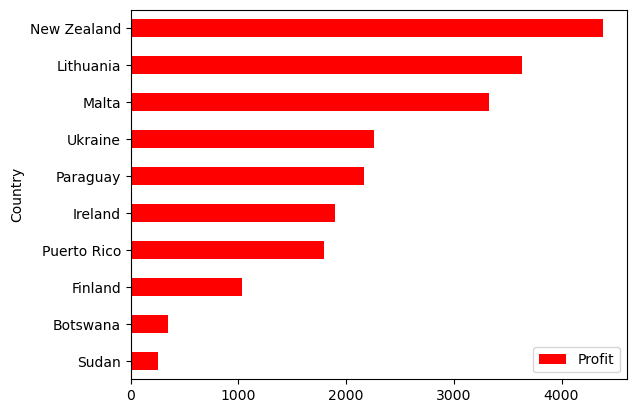

In [18]:
df.groupby('Country')[['Profit']].sum().sort_values('Profit')[0:10].plot.barh(color='r')

### Countries with highest profitability

In [19]:
df.groupby('Country')[['Profit']].sum().sort_values('Profit',ascending=False)[0:10]

,Profit
Country,
USA,1963852
Saudi Arabia,1695994
Spain,1515132
Turkey,1092326
Italy,1037531
France,928209
Germany,874676
United Arab Emirates,868775
Thailand,738607


<AxesSubplot:ylabel='Country'>

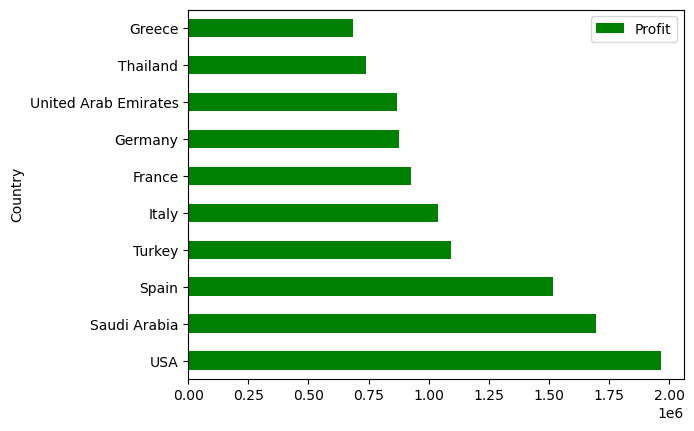

In [20]:
df.groupby('Country')[['Profit']].sum().sort_values('Profit',ascending=False)[0:10].plot.barh(color='g')

### Total Sales per country.

In [21]:
df.groupby('Country')[['Sale']].sum()

,Sale
Country,
Albania,21897
Algeria,97939
Andorra,39266
Argentina,258250
Armenia,210914
...,...
Ukraine,11844
United Arab Emirates,2923723
United Kingdom,1487698


### Cluster the data by room nights into three categories: high demand, mid demand, and low demand 
### in a new column and identify the distribution

In [22]:
bins = [0, 50, 100, df['Roomnights'].max()]
labels = ['Low', 'Mid', 'High']
df['Demand'] = pd.cut(df['Roomnights'], bins=bins, labels=labels)

In [23]:
df['Demand'].value_counts()

High    2375
Low       61
Mid       54
Name: Demand, dtype: int64

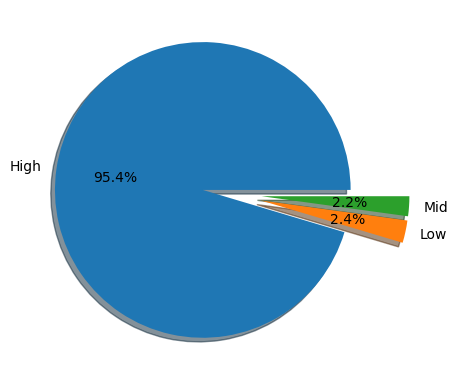

In [24]:
plt.pie(df['Demand'].value_counts(),labels=df['Demand'].value_counts().keys(),explode=[.2,.2,.2],shadow=True,autopct='%1.1f%%')
plt.show()

In [25]:
df.Date.value_counts()

12, 2019    250
11, 2019    226
02, 2019    216
03, 2019    213
10, 2019    206
01, 2019    203
06, 2019    200
08, 2019    198
07, 2019    197
05, 2019    196
09, 2019    191
04, 2019    190
11, 2020      2
09, 2020      1
07, 2020      1
Name: Date, dtype: int64

### summition of profit in each month of the date

In [26]:
df.groupby('Date')['Profit'].sum().sort_values()

Date
11, 2020       2361
07, 2020       3675
09, 2020      12915
04, 2019    1284671
09, 2019    1363443
05, 2019    1442965
06, 2019    1448467
01, 2019    1465928
07, 2019    1496309
10, 2019    1539552
08, 2019    1636414
11, 2019    1646791
03, 2019    1673169
02, 2019    1719726
12, 2019    1976393
Name: Profit, dtype: int64

In [27]:
df.to_excel(r'C:\Users\Z.A.M\Downloads\EET TEST\Hotels_Cleaned.xlsx',index=False)